In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')


# 2. Preparing the data

In [2]:
import csv
df_review = pd.read_csv("IMDB Dataset.csv",quoting=csv.QUOTE_NONE,on_bad_lines='skip')
df_review

,,,,,,,,,,,,,,,,,,,,,,,,,,review,sentiment
"""One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right",as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence,which set in right from the word GO. Trust me,this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs,sex or violence. Its is hardcore,in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City,an experimental section of the prison where all the cells have glass fronts and face inwards,so privacy is not high on the agenda. Em City is home to many..Aryans,Muslims,gangstas,Latinos,Christians,Italians,Irish and more....so scuffles,death stares,dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences,forget charm,forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal,I couldn't say I was ready for it,but as I watched more,I developed a taste for Oz,and got accustomed to the high levels of graphic violence. Not just violence,but injustice (crooked guards who'll be sold out for a nickel,inmates who'll kill on order and get away with it,well mannered,middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz,you may become comfortable with what is uncom...,positive
"""A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting",and sometimes discomforting,"sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only """"has got all the polari"""" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries",not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which,rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses,"particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.""",positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"""I thought this was a wonderful way to spend time on a too hot summer weekend",sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic,but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction,I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson,"in this she managed to tone down her """"sexy"""" image and jumped right into a average",but spirited young woman.<br /><br />This may not be the crown jewel of his career,"but it was wittier than """"Devil Wears Prada"""" and more interesting than """"Superman"""" a great comedy to go see with friends.""",positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"""Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<b

This dataset contains 50000 rows; however, to train our model faster in the following steps, we’re going to take a smaller sample of 10000 rows. This small sample will contain 9000 positive and 1000 negative reviews to make the data imbalanced (so I can teach you undersampling and oversampling techniques in the next step)

In [3]:
df_positive = df_review[df_review['sentiment']=='positive'][:9000]
df_negative = df_review[df_review['sentiment']=='negative'][:1000]

df_review_imb = pd.concat([df_positive,df_negative ])

## Dealing with Imbalanced Classes

In most cases, you’ll have a large amount of data for one class, and much fewer observations for other classes. This is known as imbalanced data because the number of observations per class is not equally distributed.

Let’s take a look at how our df_review_imb dataset is distributed.

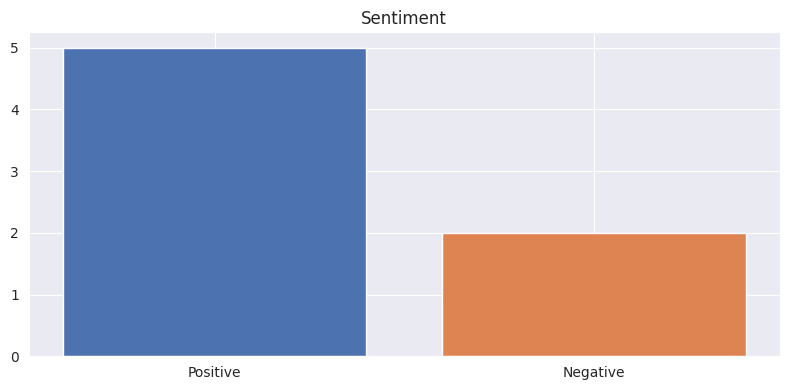

In [4]:
colors = sns.color_palette('deep')

plt.figure(figsize=(8,4), tight_layout=True)
plt.bar(x=['Positive', 'Negative'],
        height=df_review_imb.value_counts(['sentiment']),
        color=colors[:2])
plt.title('Sentiment')
plt.savefig('sentiment.png')
plt.show()

To resample our data we use the imblearn library. You can either undersample positive reviews or oversample negative reviews (you need to choose based on the data you’re working with). In this case, we’ll use the RandomUnderSampler

In [5]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state= 0)
df_review_bal,df_review_bal['sentiment']=rus.fit_resample(df_review_imb[['review']],df_review_imb['sentiment'])


df_review_bal

,review,sentiment
0,the greater your chance of surviving giant cr...,negative
1,just bend over and have someone kick you in t...,negative
2,you may become comfortable with what is uncom...,positive
3,"I'm sure you still get many fun from it.""",positive


We can compare the imbalanced and balanced dataset with the following code.

In [6]:
print(df_review_imb.value_counts('sentiment'))
print(df_review_bal.value_counts('sentiment'))

sentiment
negative    5
positive    2
dtype: int64
sentiment
negative    2
positive    2
dtype: int64



## Splitting data into train and test set


In [7]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(df_review_bal,test_size =0.33,random_state=42)

In [8]:
train_x, train_y = train['review'], train['sentiment']
test_x, test_y = test['review'], test['sentiment']

In [9]:
train_y.value_counts()

negative    1
positive    1
Name: sentiment, dtype: int64


# 3.Text Representation (Bag of words)


In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.pipeline import Pipeline

In [21]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_review)

In [22]:
vectorizer.get_feature_names_out()

array(['review', 'sentiment'], dtype=object)

In [23]:
print(X.toarray())

[[1 0]
 [0 1]]


In [24]:
vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(1, 10))  #‘word’, ‘char’, ‘char_wb’
X2 = vectorizer2.fit_transform(df_review)

In [25]:
vectorizer2.get_feature_names_out()

array(['review', 'sentiment'], dtype=object)

In [26]:
print(X2.toarray())

[[1 0]
 [0 1]]


In [ ]:
print(df_review_imb.value_counts('sentiment'))
print(df_review_bal.value_counts('sentiment'))

sentiment
negative    5
positive    2
dtype: int64
sentiment
negative    2
positive    2
dtype: int64


SPACY

In [34]:
!pip install -U spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 59.3 MB/s eta 0:00:00
  Attempting uninstall: spacy
    Found existing installation: spacy 3.5.2
    Uninstalling spacy-3.5.2:
      Successfully uninstalled spacy-3.5.2


In [35]:
import spacy
from spacy import displacy

In [40]:
spacy.prefer_gpu()
nlp = spacy.load("en_core_web_sm")

In [41]:
doc = nlp('IMDB Dataset is about reviewing lot of films')

In [42]:
for token in doc:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
            token.shape_, token.is_alpha, token.is_stop)

IMDB IMDB PROPN NNP compound XXXX True False
Dataset Dataset PROPN NNP nsubj Xxxxx True False
is be AUX VBZ ROOT xx True True
about about ADP IN prep xxxx True True
reviewing review VERB VBG pcomp xxxx True False
lot lot NOUN NN dobj xxx True False
of of ADP IN prep xx True True
films film NOUN NNS pobj xxxx True False


In [43]:
displacy.serve(doc, style="dep")


Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


In [44]:
from spacy.matcher import Matcher

In [59]:
nlp = spacy.load("en_core_web_sm")
matcher = Matcher(nlp.vocab)
# Add match ID "HelloWorld" with no callback and one pattern
pattern = [{"LOWER": "imdb"}, {"IS_PUNCT": True}, {"LOWER": "dataset"}]
matcher.add("ImdbDataset", [pattern])

In [63]:
doc = nlp("Imdb, Dataset Imdb Dataset?")
matches = matcher(doc)
for match_id, start, end in matches:
    string_id = nlp.vocab.strings[match_id]  # Get string representation
    span = doc[start:end]  # The matched span
    print(match_id, string_id, start, end, span.text)

12754194757763750939 ImdbDataset 0 3 Imdb, Dataset
